### Data needed to use the video

In [7]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks as fp

In [2]:
# Try reading the ASCII FID file manually
data = np.genfromtxt(r"c:\Users\Windows User\Documents\JEOL\data\13_03_11_indst_1H fid.asc", delimiter='\t', skip_header=1)

# Create a DataFrame with appropriate column names
df = pd.DataFrame(data, columns=['X', 'Real', 'Imaginary'])

# Display the first few rows of the DataFrame
print(df.head())

name = "JEOL data 13_03_11_indst_1H"

          X      Real  Imaginary
0  0.000000  0.000003   0.000009
1  0.000133 -0.001235  -0.003140
2  0.000267  0.050601   0.188029
3  0.000400  0.019175   0.365893
4  0.000533 -0.136525  -0.611649


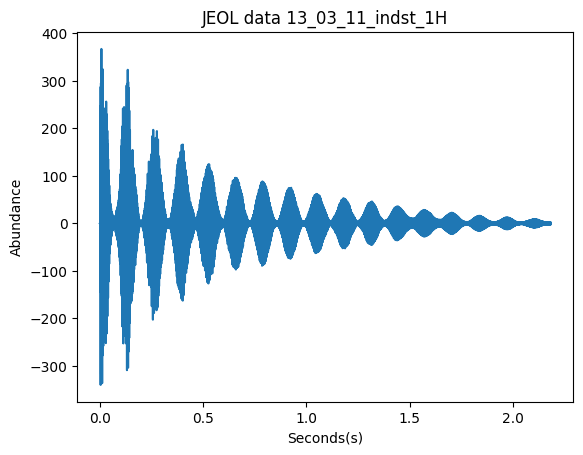

In [3]:
# Ensure data is not None and has valid content
if data is not None and data.size > 0:
	plt.plot(data[:, 0], data[:, 1])  # Assuming the first column is X and the second column is Intensity
	#plt.gca().invert_xaxis()  # Invert x-axis, use after fourier transform
	plt.title(name)
	plt.xlabel("Seconds(s)")
	plt.ylabel("Abundance")
	plt.show()
else:
	print("No valid data found in the file.")

In [4]:
from scipy.fft import fft, fftfreq, fftshift

# Perform Fourier Transform
real_part = data[:, 1]
fft_result = fft(real_part)
frequencies = fftfreq(len(real_part), d=(data[1, 0] - data[0, 0]))  # Calculate frequency axis
fft_magnitude = np.abs(fft_result)

In [5]:
# Keep only the positive half of the spectrum
positive_frequencies = frequencies[frequencies >= 0]
positive_magnitude = fft_magnitude[frequencies >= 0]
# Adjust frequencies by subtracting the x_offset

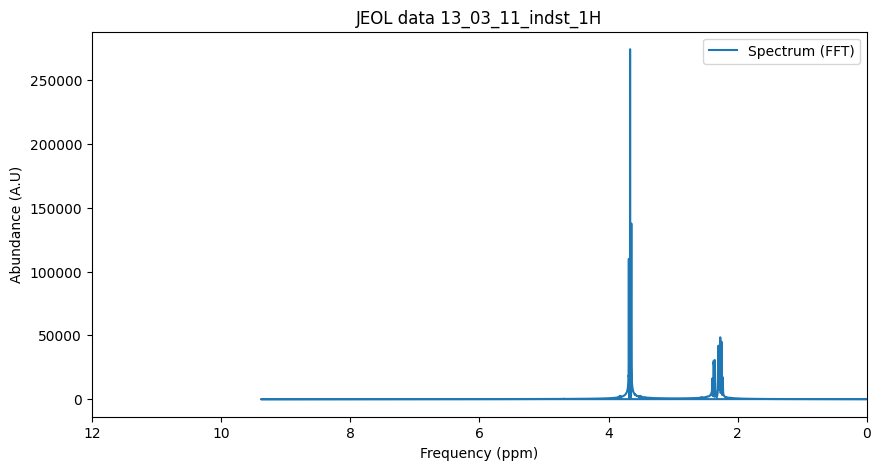

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(fftshift(positive_frequencies) / 399.78219838, fftshift(positive_magnitude), label="Spectrum (FFT)")
plt.gca().invert_xaxis()  # Invert the x-axis
plt.title(name)
plt.xlabel("Frequency (ppm)")
plt.ylabel("Abundance (A.U)")
plt.xlim(12, 0)  # Adjust x-axis limits as needed
plt.legend()
plt.show()

### finding the peaks

Part of my problem with the zoom in aspect of the thing is that the threshhold of the peaks is non-existant. If I can create a threshold for the peaks then the noisy ch data shouldn't be there anymore

There is height. Prominence, and distance. I believe that my main thing is height. I think That I can create a threshold constant of the AU so that then it automatically just looks at the significant peaks in the data

I just need to change the height threshold. idk what distance that I should make it. but doing this helps with the resolution of the instrument. prominence as a parameter likely is part of the integration issue. It helps get rid of less intense peaks. I just need to play with these variables

In [8]:
transformed_data = (positive_frequencies, positive_magnitude)